In [1]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]

font = 22   
legendfont = 18
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
# Two shower contains the additional cuts from joseph
stage= 'singleshower'
name = stage
f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

#name = 'twoshower'

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)

df['mu_endx'] = np.where(df.mu_startx-df.vtx_x == 0, df.mu_endx, df.mu_startx)
df['mu_endy'] = np.where(df.mu_starty - df.vtx_y == 0, df.mu_endy, df.mu_starty)
df['mu_endz'] = np.where(df.mu_startz - df.vtx_z == 0, df.mu_endz, df.mu_startz)

df0['mu_endx'] = np.where(df0.mu_startx - df0.vtx_x == 0, df0.mu_endx, df0.mu_startx)
df0['mu_endy'] = np.where(df0.mu_starty - df0.vtx_y == 0, df0.mu_endy, df0.mu_starty)
df0['mu_endz'] = np.where(df0.mu_startz - df0.vtx_z == 0, df0.mu_endz, df0.mu_startz)

df1['mu_endx'] = np.where(df1.mu_startx - df1.vtx_x == 0, df1.mu_endx, df1.mu_startx)
df1['mu_endy'] = np.where(df1.mu_starty - df1.vtx_y == 0, df1.mu_endy, df1.mu_starty)
df1['mu_endz'] = np.where(df1.mu_startz - df1.vtx_z == 0, df1.mu_endz, df1.mu_startz)

df['mu_startx'] = df['vtx_x']
df['mu_starty'] = df['vtx_y']
df['mu_startz'] = df['vtx_z']

df0['mu_startx'] = df0['vtx_x']
df0['mu_starty'] = df0['vtx_y']
df0['mu_startz'] = df0['vtx_z']

In [3]:
print df0.shape, df1.shape, df.shape

(257, 91) (7, 91) (2167, 91)


In [4]:
dfa = df.query('gamma_origin != 2')

cos_v = df.query('bkgd_id == 1 or gamma_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')

oth_v = dfa.query('bkgd_id == 0') #noise
cc1pi0_outFV_v = dfa.query('bkgd_id == 4')
multpi0_v = dfa.query('bkgd_id == 5')
nue_v = dfa.query('bkgd_id == 6')
antinumu_v = dfa.query('bkgd_id == 7')
cccex_v = dfa.query('bkgd_id == 8 ')
ccgamma_v = dfa.query('bkgd_id == 10')
ccoth_v = dfa.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = dfa.query('bkgd_id == 13 or bkgd_id == 9')

print 'Cosmic MC : ', cos_v.shape[0]
print 'CC1pi0: ', cc1pi0_v.shape[0]
print 'CC0pi0: ', cccex_v.shape[0] + ccgamma_v.shape[0] +ccoth_v.shape[0]
print 'NCpi0: ', nc1pi0_v.shape[0] 
print 'NC0pi0: ', ncoth_v.shape[0]
print 'Other : ', oth_v.shape[0] + cc1pi0_outFV_v.shape[0] + multpi0_v.shape[0] + nue_v.shape[0]+antinumu_v.shape[0]
#print 'Cosmic Data :', 

Cosmic MC :  138
CC1pi0:  1289
CC0pi0:  472
NCpi0:  57
NC0pi0:  28
Other :  183


In [5]:
all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('gamma_origin != 2 and gamma_origin != -1')

cos_v = df.query('bkgd_id == 1 or gamma_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                 bkgd_id ==12 or bkgd_id ==13) & (gamma_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                    ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13) & gamma_type != 1)')

noise_v = df.query('gamma_origin==-1')

print cos_v.shape[0] + cc1pi0_v.shape[0] + nc1pi0_v.shape[0]+multpi0_v.shape[0]+\
cccex_v.shape[0] + nu_EM_v.shape[0] + oth_v.shape[0] + noise_v.shape[0]

2167


In [7]:
cos_pi0_v = cos_v.query('(gamma_origin == 2 and gamma_from_pi0 == 1)')
#print cos_pi0_v.shape[0]

print cos_pi0_v.shape[0]
print cos_pi0_v.event.values
print cos_pi0_v.pi0_low_from_pi0.values
print cos_pi0_v.pi0_low_origin.values
print cos_pi0_v.pi0_low_type.values


15
[  49  105  487  718  782  800  983 1031 1061 1384 1463 1632 1839 1911 2058]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [7]:
# This one is for single shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1)
# type: track (0), shower (1), noise (-1)
ccoth_trk_nu_v = oth_v.query('gamma_type == 0 & gamma_origin == 1')
ccoth_shr_pi0_nu_v = oth_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
ccoth_shr_nopi0_nu_v = oth_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 ==0')
ccoth_noise_v = oth_v.query('gamma_type == -1')

cc1pi0_trk_nu_v = cc1pi0_v.query('gamma_type == 0 & gamma_origin == 1')
cc1pi0_shr_pi0_nu_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
cc1pi0_shr_nopi0_nu_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 0')
cc1pi0_noise_v = cc1pi0_v.query('gamma_type == -1')

print ' All CCOther: ' ,oth_v.shape[0]
print '$\\nu$ track: ', ccoth_trk_nu_v.shape[0] 
print '$\\nu$ shower: ',ccoth_shr_nopi0_nu_v.shape[0]
print '$\\nu$ pi0 shower :', ccoth_shr_pi0_nu_v.shape[0]
print '$\\nu$ noise: ', ccoth_noise_v.shape[0]


print ' All Signal: ' , cc1pi0_v.shape[0]
print '$\\nu$ track: ', cc1pi0_trk_nu_v.shape[0] 
print '$\\nu$ shower: ',cc1pi0_shr_nopi0_nu_v.shape[0]
print '$\\nu$ pi0 shower :', cc1pi0_shr_pi0_nu_v.shape[0]
print '$\\nu$ noise: ', cc1pi0_noise_v.shape[0]


 All CCOther:  190
$\nu$ track:  170
$\nu$ shower:  8
$\nu$ pi0 shower : 12
$\nu$ noise:  0
 All Signal:  1289
$\nu$ track:  30
$\nu$ shower:  9
$\nu$ pi0 shower : 1250
$\nu$ noise:  0


In [8]:
print 'CC1pi0: ', cc1pi0_v.shape[0]
print 'FSEM  : ', nu_EM_v.shape[0]
print 'CCCex : ', cccex_v.shape[0]
print 'CCCex : ', multpi0_v.shape[0]
print 'NCpi0: ', nc1pi0_v.shape[0] 
print 'Other : ', oth_v.shape[0]
print 'Cosmic MC : ', cos_v.shape[0]

tot = cc1pi0_v.shape[0] + nu_EM_v.shape[0] + cccex_v.shape[0] + multpi0_v.shape[0] + nc1pi0_v.shape[0] + oth_v.shape[0] + cos_v.shape[0]
print tot

CC1pi0:  1289
FSEM  :  295
CCCex :  83
CCCex :  108
NCpi0:  57
Other :  190
Cosmic MC :  138
2160


In [9]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'mu_startx'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nu_EM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)) ] 
oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

tot = len(all_w) * mc_to_onbeam + len(cos_ext_w) * off_to_on

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449


In [10]:
nu_EM_ccpi0_outFV = nu_EM_v.query('bkgd_id == 4')
nu_EM_nccex = nu_EM_v.query('bkgd_id == 9')
nu_EM_ngamma = nu_EM_v.query('bkgd_id == 10')
nu_EM_kaon = nu_EM_v.query('bkgd_id == 11')
nu_EM_brem = nu_EM_v.query('bkgd_id == 12 or bkgd_id == 13')
#nu_EM_ncbrem = nu_EM_v.query('bkgd_id == 13')

oth_nue = oth_v.query('bkgd_id == 6')
oth_antinumu = oth_v.query('bkgd_id == 7')
oth_misreco = oth_v.query('bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13')

tot = df.shape[0]*mc_to_onbeam + df1.shape[0]*off_to_on
print tot
#print oth_v.shape[0]
#print oth_nue.shape[0] + oth_antinumu.shape[0] + oth_misreco.shape[0]
#print nu_EM_v.shape[0]
#print nu_EM_ccpi0_outFV.shape[0]+nu_EM_ccbrem.shape[0] + nu_EM_ncbrem.shape[0]+\
#nu_EM_nccex.shape[0] + nu_EM_ngamma.shape[0] + nu_EM_kaon.shape[0] 


267.099608811


In [11]:
print '\nSignal : ', float(len(cc1pi0_v))*mc_to_onbeam /tot

print '\nBackgorunds (CCCex): '
print ' CC Cex : ', float(cccex_v.shape[0])*mc_to_onbeam / tot

print '\nBackgorunds (Multiple Pi0): '
print ' Multiple pi0 : ', float(multpi0_v.shape[0])*mc_to_onbeam / tot

print '\nBackgorunds (NC >=1 pi0): '
print ' NC 1pi0 : ', float(nc1pi0_v.shape[0])*mc_to_onbeam / tot

print '\nBackgorunds (FSEM): '
print ' CC 1pi0 out FV : ', float(nu_EM_ccpi0_outFV.shape[0])*mc_to_onbeam/ tot
print ' CC gamma : ', float(nu_EM_ngamma.shape[0])*mc_to_onbeam / tot
print ' Kaon : ', float(nu_EM_kaon.shape[0])*mc_to_onbeam / tot
print ' NC Cex : ', float(nu_EM_nccex.shape[0])*mc_to_onbeam / tot
print ' Brem : ', float(nu_EM_brem.shape[0])*mc_to_onbeam / tot


print '\nBackgorunds (Other): '
print ' Nue : ', float(oth_nue.shape[0])*mc_to_onbeam/ tot
print ' Antinumu : ', float(oth_antinumu.shape[0])*mc_to_onbeam/tot
print ' Misreco  : ', float(oth_misreco.shape[0])*mc_to_onbeam/tot

print '\nBackgorunds (Cosmics): '
print ' Cosmic+nu : ', float(cos_v.shape[0])*mc_to_onbeam / tot
print ' Cosmic (Data) : ', df1.shape[0] * off_to_on / tot
# print ' Noise         : ', len(oth_w) * off_to_on / tot



Signal :  0.561028265619

Backgorunds (CCCex): 
 CC Cex :  0.0361251714867

Backgorunds (Multiple Pi0): 
 Multiple pi0 :  0.0470062472357

Backgorunds (NC >=1 pi0): 
 NC 1pi0 :  0.0248088527077

Backgorunds (FSEM): 
 CC 1pi0 out FV :  0.021762151498
 CC gamma :  0.022197394528
 Kaon :  0.00391718726964
 NC Cex :  0.00522291635953
 Brem :  0.0752970441832

Backgorunds (Other): 
 Nue :  0.00696388847937
 Antinumu :  0.00304670120972
 Misreco  :  0.0726855860034

Backgorunds (Cosmics): 
 Cosmic+nu :  0.0600635381345
 Cosmic (Data) :  0.0568283540757


In [12]:
exclude_var_v =[ 'mu_startx','mu_starty','mu_startz','mu_endx','mu_endy','mu_endz','vtx_x',\
                'vtx_y','vtx_z','pi0_oangle','pi0_totalE','mu_phi','pi0_Easym','pi0_low_radL',\
                'pi0_high_radL','pi0_high_shrE','pi0_mass_corr','pi0_low_shrE_corr','pi0_high_shrE_corr',\
                'gamma_E','gamma_RL', 'gamma_E_corr',\
                'tot_hits_0','tot_hits_1','tot_hits_2','n_track_hits_0',\
                'n_track_hits_1', 'n_track_hits_2','n_shower_hits_0','n_shower_hits_1','n_shower_hits_2']  

In [16]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',pottitle='',unit='cm'):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) *off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,multpi0_w,cccex_w,nu_EM_w,sig_w]

    labels_tst = ['Cosmics','Cosmic + Neutrino','Other','$\\nu_{\mu}$ NC $\pi^0$',\
              '$\\nu_{\mu}$ CC Mult $\pi^0$','$\\nu_{\mu}$ CC CEx','Final State EM',\
              '$\\nu_{\mu}$ CC 1 $\pi^0$']
    
    
    colors_tst = ['lightgrey','dimgrey','darkgoldenrod','lemonchiffon','turquoise','darkcyan','darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    
    counts, edges,_ = ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,multpi0_v[var].values,\
        cccex_v[var].values,nu_EM_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='Data',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    lgd = 0
    
    if unit == 'rad' or unit == 'asym' or var =='pi0_low_IP_w_vtx' or var =='pi0_high_IP_w_vtx' or\
       var == 'pi0_IP' or var == 'gamma_IP_w_vtx':
        plt.ylabel('Events / %0.2f %s '%(bin_width,unit),fontsize=font,weight='bold')
    elif unit == 'empty':
        plt.ylabel('Events',fontsize=font,weight='bold')
    elif unit.split('(')[0] == 'cos':
        plt.ylabel('Events / %0.2f'%bin_width,fontsize=font,weight='bold')
    else:
        plt.ylabel('Events / %i %s '%(bin_width,unit),fontsize=font,weight='bold')
    
    t1 = plt.text(0.645,1.02,r'4.92 \textbf{$\times 10^{19}$} POT',weight='bold',color='r',fontsize=font,transform = ax.transAxes)
    t2 = plt.text(0.001,1.01,r'MicroBooNE Preliminary',weight='bold',color='r',fontsize=font,transform = ax.transAxes)

    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
    plt.xlim(xmin,xmax)

    if var in exclude_var_v:
        lgd = plt.legend(handles=handles,fontsize=legendfont,loc='upper left',bbox_to_anchor=(1,1),title=pottitle)
    else:
        lgd = plt.legend(handles=handles,fontsize=legendfont,loc=0,title=pottitle) #,loc='upper left',bbox_to_anchor=(1,0.9))
        
    fig.tight_layout()
    fig.subplots_adjust(top=.95)


    plt.yscale('linear')
    plt.ylim(0)    
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,t1,t2,), bbox_inches='tight')

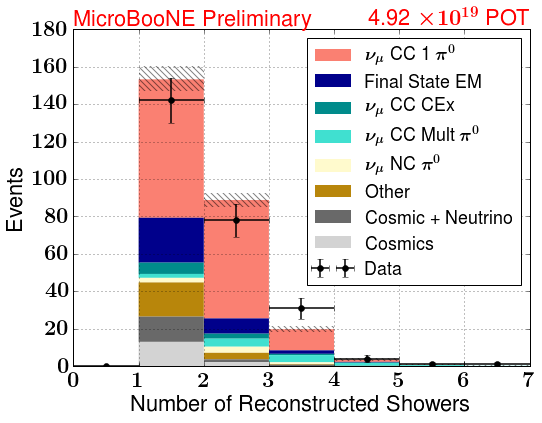

In [17]:
makeOnOffPlots('nshrs',0,7,nbins=7,xlabel='Number of Reconstructed Showers',unit='empty')

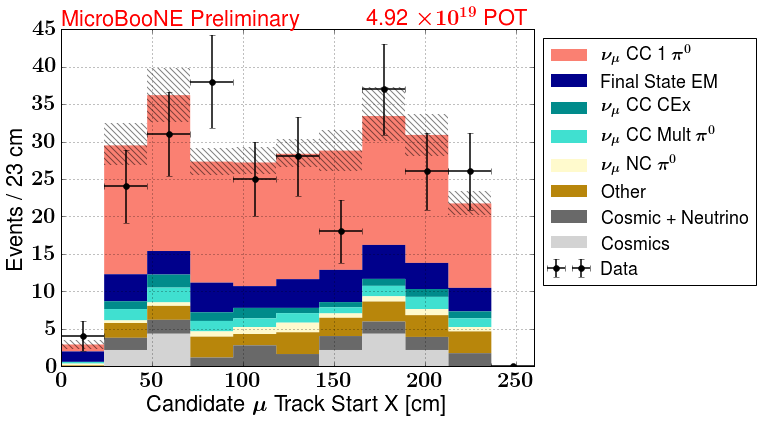

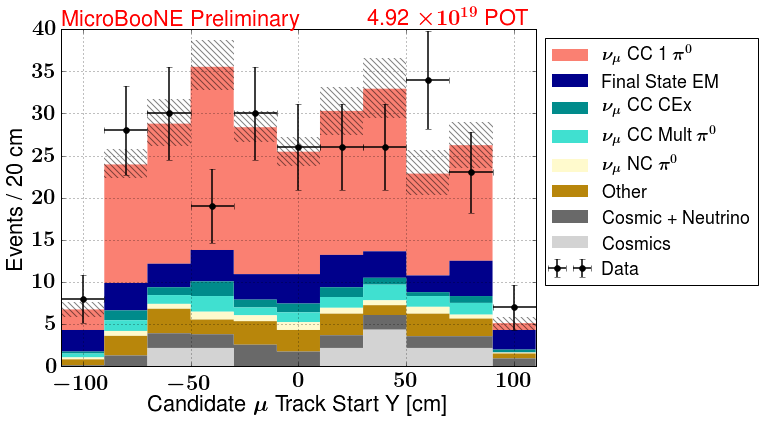

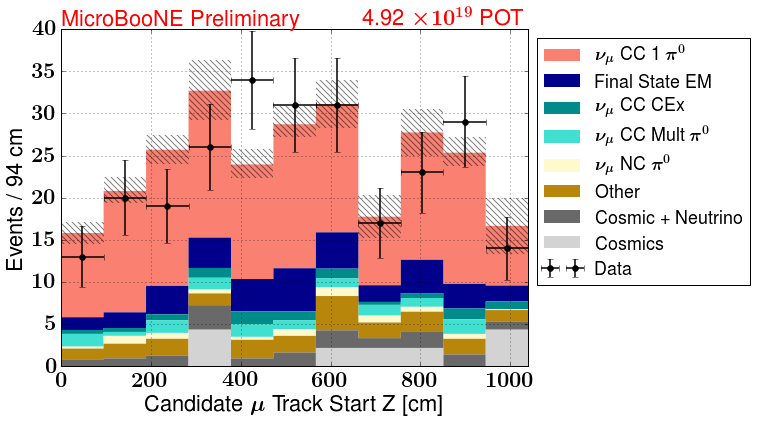

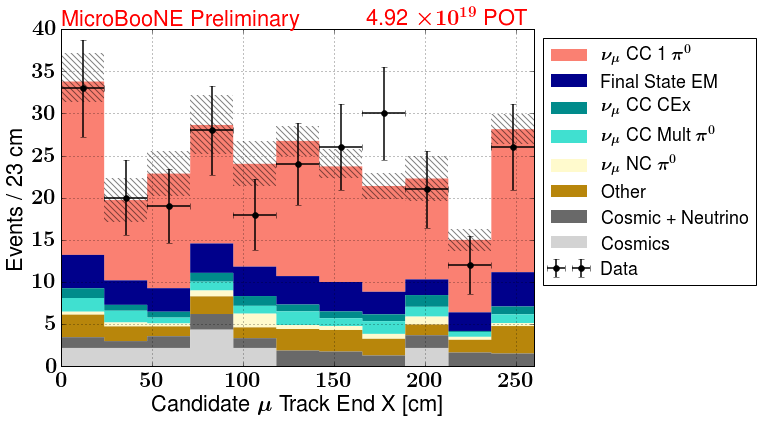

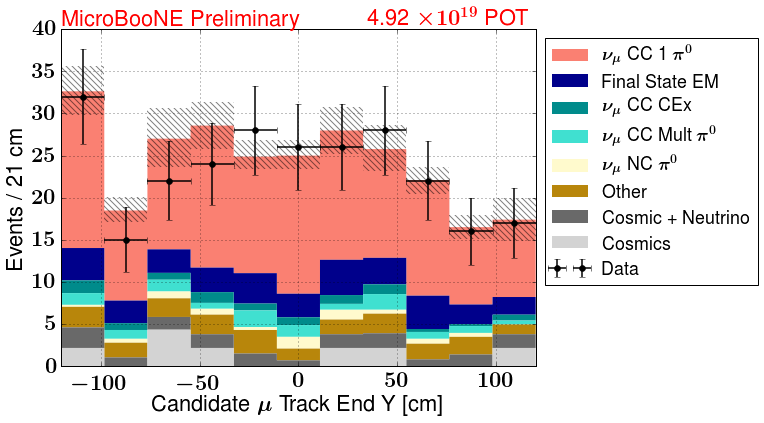

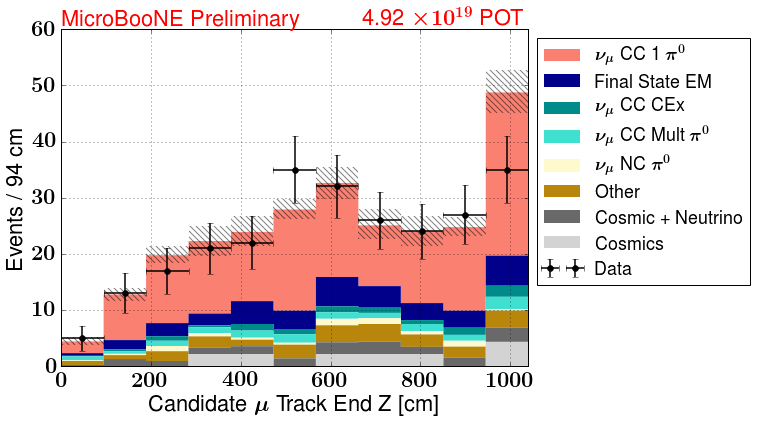

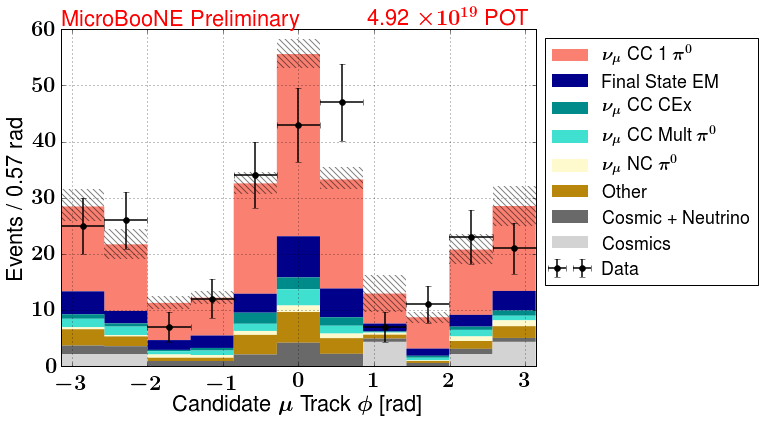

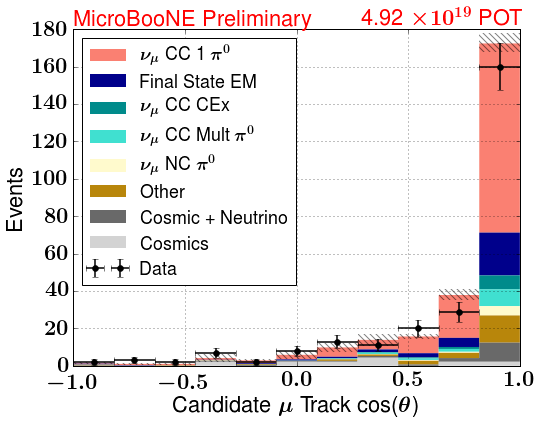

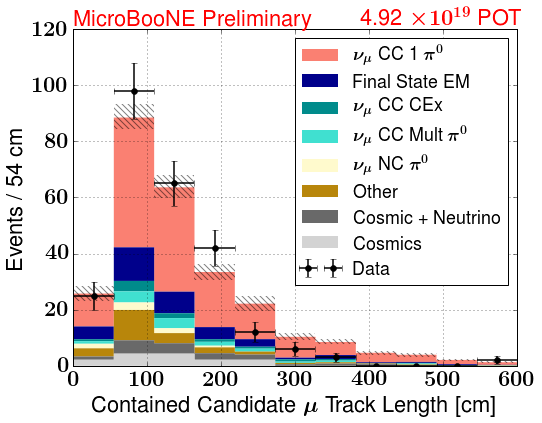

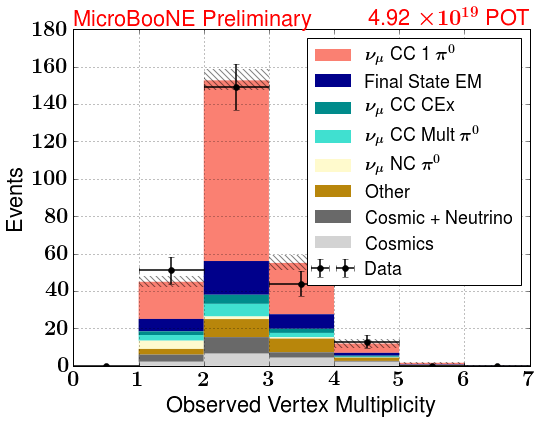

In [18]:
makeOnOffPlots('mu_startx',0,260,nbins=11,xlabel='Candidate $\mu$ Track Start X [cm]')
makeOnOffPlots('mu_starty',-110,110,nbins=11,xlabel='Candidate $\mu$ Track Start Y [cm]')
makeOnOffPlots('mu_startz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track Start Z [cm]')
makeOnOffPlots('mu_endx',0,260,nbins=11,xlabel='Candidate $\mu$ Track End X [cm]')
makeOnOffPlots('mu_endy',-120,120,nbins=11,xlabel='Candidate $\mu$ Track End Y [cm]')
makeOnOffPlots('mu_endz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track End Z [cm]')

makeOnOffPlots('mu_phi',-3.14,3.14,nbins=11,xlabel='Candidate $\mu$ Track $\\phi$ [rad]',unit='rad')
makeOnOffPlots('mu_angle',-1,1,nbins=11,xlabel='Candidate $\mu$ Track cos($\\theta$)',unit='empty')
makeOnOffPlots('mu_len',0,600,nbins=11,xlabel='Contained Candidate $\mu$ Track Length [cm]')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Observed Vertex Multiplicity',unit='empty')

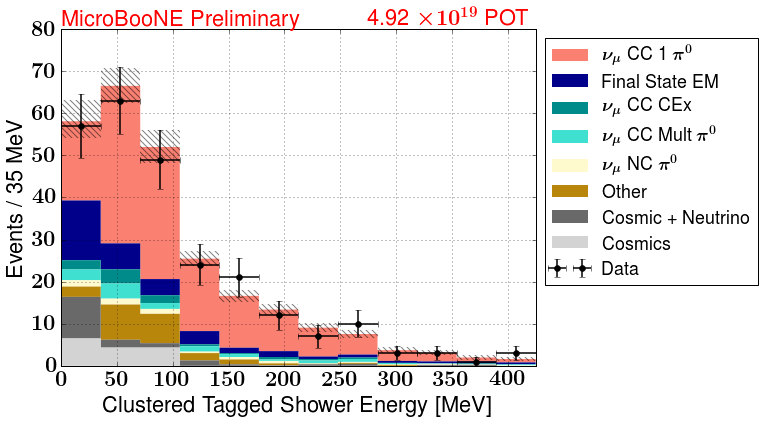

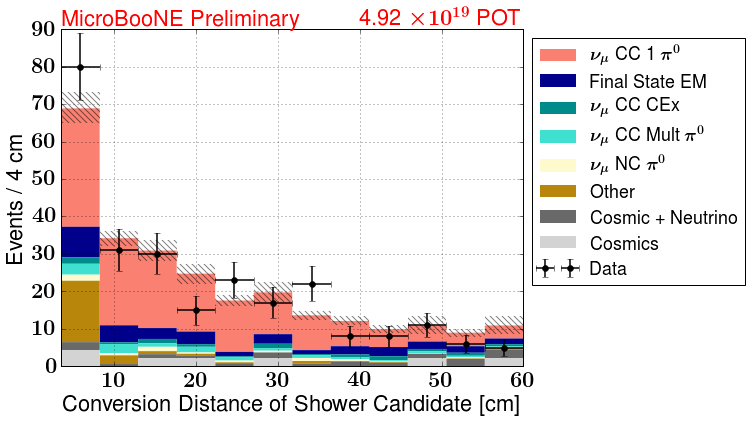

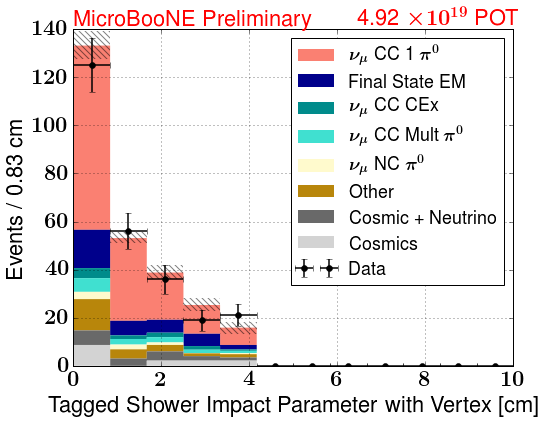

In [19]:
makeOnOffPlots('gamma_E',0,425,nbins=12,xlabel='Clustered Tagged Shower Energy [MeV]',unit='MeV')
makeOnOffPlots('gamma_RL',3.5,60,nbins=12,xlabel='Conversion Distance of Shower Candidate [cm]')
makeOnOffPlots('gamma_IP_w_vtx',0,10,nbins=12,xlabel='Tagged Shower Impact Parameter with Vertex [cm]')



ValueError: weights should have the same shape as x

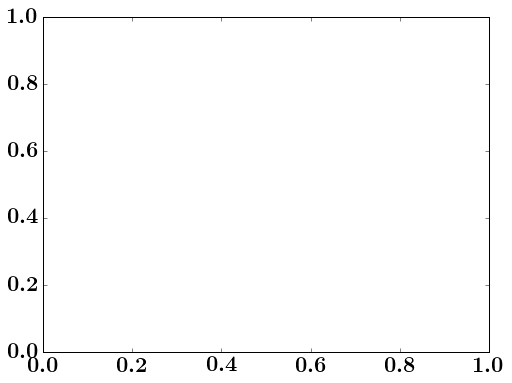

In [20]:
df0['gamma_E_corr'] = df0['gamma_E'] / 0.77
df1['gamma_E_corr'] = df1['gamma_E'] / 0.77
df['gamma_E_corr'] = df['gamma_E'] / 0.77


dfa = df.query('gamma_origin != 2')

cos_v = df.query('bkgd_id == 1 or gamma_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                 bkgd_id ==12 or bkgd_id ==13) & (gamma_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                    ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13) & gamma_type != 1)')

makeOnOffPlots('gamma_E_corr',0,425,nbins=12,xlabel='Corrected Tagged Shower Energy [MeV]',unit='MeV')